# Sales Prediction

## Simple Linear Regression

## Problem Statement

### Build a model which predicts sales based on the money spent on different platforms for marketing.

## Data

## Import Libraries

In [15]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

In [17]:
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and Understanding the Dat

In [18]:
add=pd.read_csv('advertising.csv')
add.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection (Number of rows and columns)

In [19]:
add.shape

(200, 4)

In [20]:
add.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Check Summary Of Data

In [21]:
add.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning

## Check for missing values

In [22]:
add.isnull().sum()*100/add.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

### Observation - There are no missing values in the data

## Check For The Outliers In Data

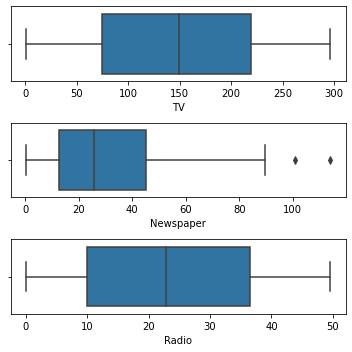

In [23]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(add['TV'], ax = axs[0])
plt2 = sns.boxplot(add['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(add['Radio'], ax = axs[2])
plt.tight_layout()

### Observation - There are no considerable outliers present in the data.

## Exploratory Data Analysis

## Univariate Analysis

## Sales (Target Variable)

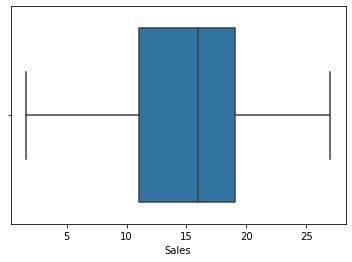

In [24]:
sns.boxplot(add['Sales'])
plt.show()


## Scatter plot to check how dependent and independent variables are related with each other

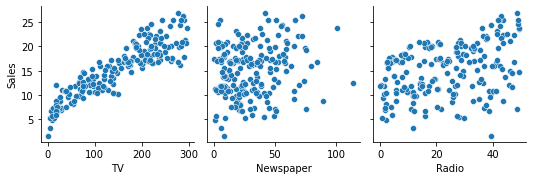

In [54]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(add, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', aspect=1, kind='scatter',diag_kind=None)
plt.show()

## Check Correlation

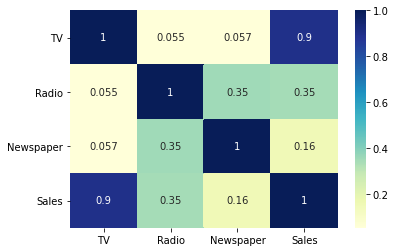

In [55]:
# Let's see the correlation between different variables.
sns.heatmap(add.corr(), cmap="YlGnBu", annot = True)
plt.show()


## As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

## Model Building

## Performing Simple Linear Regression

## Generic Steps in model building using statsmodels

In [56]:
x=add['TV']
y=add['Sales']

## Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3, random_state=100)

In [58]:
# Let's now take a look at the train dataset
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [59]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

# Building a Linear Model

### You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [60]:
import statsmodels.api as sm

In [61]:
# Add a constant to get an intercept
x_train_sm=sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr=sm.OLS(y_train,x_train_sm).fit()


In [62]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

# Equation Of A Line

# y = mx+c

# y = 0.054546 * x + 6.948683

## Listing of different parameters of the regression line

In [63]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           1.52e-52
Time:                        17:26:54   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

# Looking at some key statistics from the summary

## 1. The coefficient for TV is 0.054, with a very low p value

## 2. R - squared is 0.816

## 3. F statistic has a very low p value (practically low)

## The fit is significant. Let's visualize how well the model fit the data.

## From the parameters that we get, our linear regression equation becomes:

## Sales=6.948+0.054×TV

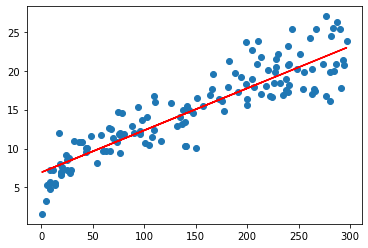

In [64]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

# Model Evaluation

## Residual analysis

## Distribution of the error terms

In [66]:
y_train_pred=lr.predict(x_train_sm)
res=(y_train - y_train_pred)

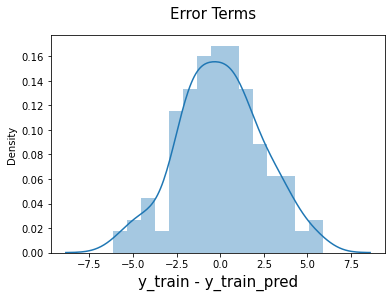

In [67]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

## The residuals are normally distributed with a mean 0.

### Looking for patterns in the residuals

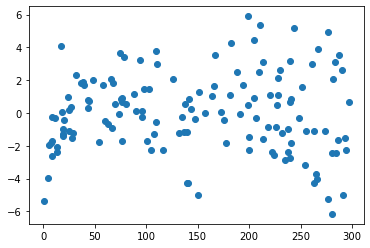

In [68]:
plt.scatter(x_train,res)
plt.show()


### As you can see, the regression line is a pretty good fit to the data

# Predictions on the Test Set

In [25]:
# Add a constant to X_test


# Predict the y values corresponding to X_test_sm


In [26]:
y_pred.head()


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Looking at the RMSE

In [28]:
#Returns the mean squared error; we'll take a square root


2.019296008966231

## Checking the R-squared on the test set

In [29]:
r_squared = r2_score(y_test, y_pred)


0.7921031601245662

## Visualizing the fit on the test set

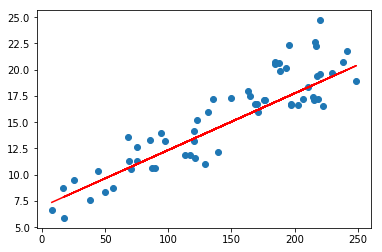